In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("/Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Data Exploration**

1.    Identify the number of rows and columns in the dataset

2.   determine the data types of each column

3.    check for missing values






In [31]:
# There is 148654 columns
df.shape


(148654, 13)

In [32]:
df.dtypes


Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [33]:
# There's missing values
df.isnull().sum()


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

**Descriptive Statistics**

1.   Calculate basic statistics mean, median, mode, minimum, and maximum salary
2.   determine the range of salaries
3.   find the standard deviation






In [34]:
df['TotalPay'].mean()


74768.32197169267

In [35]:
df['TotalPay'].median()


71426.60999999999

In [36]:
df['TotalPay'].mode()


0    0.0
Name: TotalPay, dtype: float64

In [52]:
# outlier
df['TotalPay'].min()


-618.13

In [38]:
df['TotalPay'].max()


567595.43

In [39]:
salary_range = df['TotalPay'].max() - df['TotalPay'].min()
salary_range


568213.56

In [40]:
df.std()


<ipython-input-40-ce97bb7eaef8>:1: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Id                  42912.857795
BasePay             42764.635495
OvertimePay         11454.380559
OtherPay             8056.601866
Benefits            15402.215858
TotalPay            50517.005274
TotalPayBenefits    62793.533483
Year                    1.117538
Notes                        NaN
Status                       NaN
dtype: float64

**Data Cleaning**



In [41]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [42]:
# I will start with BasePay
# Filling null values with the mean value
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)


In [43]:
# Same Here
df['Benefits'].fillna(df['Benefits'].mean() , inplace = True)


In [44]:
# Filling null values in Notes and Status with 0
# Because all rows in these columns are null .
df['Notes'].fillna(0 , inplace = True)
df['Status'].fillna(0 , inplace = True)


In [45]:
# OvertimePay and OtherPay have just 4 missing values, so I will drop them
df.dropna(inplace = True)

**Data Visualization**

1. Create histograms or bar charts to visualize the distribution of salaries
2. use pie charts to represent the proportion of employees in different departments.

   



<Axes: xlabel='TotalPay', ylabel='Count'>

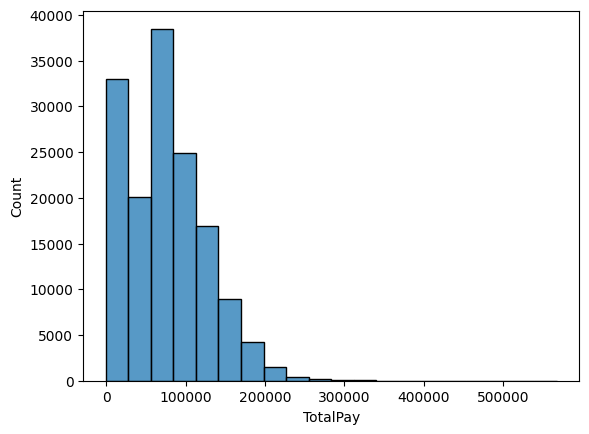

In [46]:
sns.histplot(df['TotalPay']  , bins=20)


In [47]:
stage = df['JobTitle'].value_counts()

total_values = stage.sum()
percentage_values = (stage / total_values) * 100
filtered_data = stage[percentage_values >0.5]

names = filtered_data.index
values = filtered_data.values

fig = px.pie(names=names, values=values, title="JobTitle")
fig.show()




**Grouped Analysis**

*    Group the data by one or more columns and calculate summary statistics for each group
*    compare the average salaries across different groups.



In [48]:
df.groupby('JobTitle')['TotalPay'].mean()

JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2158, dtype: float64

In [49]:
df.groupby(['TotalPayBenefits', 'JobTitle'])['TotalPay'].mean()

TotalPayBenefits  JobTitle                                      
-618.13           Counselor, Log Cabin Ranch                          -618.13
-33.89            Police Officer 3                                       0.00
-8.20             Police Officer 3                                       0.00
-2.73             Police Officer 3                                       0.00
 0.00             Account Clerk                                          0.00
                                                                      ...    
 436224.36        Chief Investment Officer                          339653.70
 479652.21        Asst Med Examiner                                 390111.98
 510732.68        Deputy Chief 3                                    471952.64
 538909.28        CAPTAIN III (POLICE DEPARTMENT)                   538909.28
 567595.43        GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    567595.43
Name: TotalPay, Length: 143534, dtype: float64

**Simple Correlation Analysis**  

1.   Identify any correlation between salary and another numerical column
2.   plot a scatter plot to visualize the relationship.



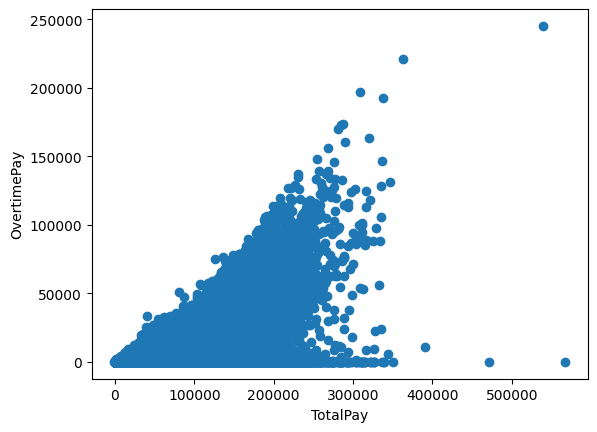

In [51]:
# OvertimePay , TotalPay

salary_column = 'TotalPay'
numerical_column = 'OvertimePay'

Correlation_Analysis = df[[salary_column, numerical_column]]


correlation_coefficient = Correlation_Analysis[salary_column].corr(Correlation_Analysis[numerical_column])

plt.scatter(Correlation_Analysis[salary_column], Correlation_Analysis[numerical_column])
plt.xlabel(salary_column)
plt.ylabel(numerical_column)
plt.show()


Summary of Insights :

1.   In the first step 'Data Exploration' we gained insights into our data by examining null values, data types, and the overall shape of the dataset.

2.   Moving on to the next step, 'Descriptive Statistics,' we obtained an idea about the salary range.
3.   Subsequently, we performed data cleaning to enhance the quality of our dataset.
4.  In the 'Data Visualization' step, we acquired a clear visual understanding of the data.   
5.  During the Grouped Analysis, we observed how each department has its own salary distribution. Additionally, we compared various columns to uncover patterns or differences.
6.  For the Correlation Analysis, we selected 'OvertimePay' and 'TotalPay,' and visualized the correlation through a plot. Notably, we identified a positive correlation between these variables.

